1. Importing libraries
2. Importing dataframes
3. Customer behavior in different geographic areas
4. Low-activity customer flag
5. Exporting files and visualizations

1. Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

2. Importing Data Frames

In [5]:
path = r'C:/Users/Alejandra/Documents/CF/Data Immersion/Achievement 4/06022025_Instacart Basket Analysis'

In [6]:
#Loading pickle files
df = pd.read_pickle(os.path.join(path, '02_Data', 'Prepared Data', 'orders_products_customers_final.pkl'))

3. Customer behavior in different geographic areas

In [8]:
#Defining dictionary of region-states
region_mapping = {
    'Northeast': ['Connecticut', 'Maine', 'Massachusetts', 'New Hampshire', 'Rhode Island', 'Vermont',
                  'New Jersey', 'New York', 'Pennsylvania'],
    'Midwest': ['Illinois', 'Indiana', 'Michigan', 'Ohio', 'Wisconsin', 'Iowa', 'Kansas', 'Minnesota',
                'Missouri', 'Nebraska', 'North Dakota', 'South Dakota'],
    'South': ['Delaware', 'Florida', 'Georgia', 'Maryland', 'North Carolina', 'South Carolina', 'Virginia',
              'District of Columbia', 'West Virginia', 'Alabama', 'Kentucky', 'Mississippi', 'Tennessee',
              'Arkansas', 'Louisiana', 'Oklahoma', 'Texas'],
    'West': ['Arizona', 'Colorado', 'Idaho', 'Montana', 'Nevada', 'New Mexico', 'Utah', 'Wyoming',
             'Alaska', 'California', 'Hawaii', 'Oregon', 'Washington']
}

In [9]:
#Creating lookup dictionary from dictionary of region-states
state_to_region = {state: region for region, states in region_mapping.items() for state in states}

In [10]:
df['geo_region'] = df['state'].map(state_to_region)

In [11]:
#Checking result
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order_clean,product_id,product_name,department_id,prices,...,user_frequency,gender,state,age,date_joined,dependants,family_status,income,_merge,geo_region
0,2539329,1,1,2,8,0.0,196,Soda,7,9.0,...,non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
1,2539329,1,1,2,8,0.0,14084,Organic Unsweetened Vanilla Almond Milk,16,12.5,...,non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
2,2539329,1,1,2,8,0.0,12427,Original Beef Jerky,19,4.4,...,non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
3,2539329,1,1,2,8,0.0,26088,Aged White Cheddar Popcorn,19,4.7,...,non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South
4,2539329,1,1,2,8,0.0,26405,XL Pick-A-Size Paper Towel Rolls,17,1.0,...,non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,both,South


In [12]:
df['geo_region'].value_counts(dropna=False)

geo_region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [13]:
#Changing display settings to see all columns
pd.set_option('display.max_columns', None)

In [14]:
#Cleaning unnecessary columns to reduce sluggishness 
df.drop(columns=['ord_prod_merge', 'busiest_day', 'date_joined', '_merge'], inplace=True)

In [15]:
#Checking drops
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order_clean,product_id,product_name,department_id,prices,price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending_avg,spender_type,user_frequency_median,user_frequency,gender,state,age,dependants,family_status,income,geo_region
0,2539329,1,1,2,8,0.0,196,Soda,7,9.0,Mid-range product,Regular days,Regularly busy,10,New customer,6.367797,low spender,20.5,non-frequent customer,Female,Alabama,31,3,married,40423,South
1,2539329,1,1,2,8,0.0,14084,Organic Unsweetened Vanilla Almond Milk,16,12.5,Mid-range product,Regular days,Regularly busy,10,New customer,6.367797,low spender,20.5,non-frequent customer,Female,Alabama,31,3,married,40423,South
2,2539329,1,1,2,8,0.0,12427,Original Beef Jerky,19,4.4,Low-range product,Regular days,Regularly busy,10,New customer,6.367797,low spender,20.5,non-frequent customer,Female,Alabama,31,3,married,40423,South
3,2539329,1,1,2,8,0.0,26088,Aged White Cheddar Popcorn,19,4.7,Low-range product,Regular days,Regularly busy,10,New customer,6.367797,low spender,20.5,non-frequent customer,Female,Alabama,31,3,married,40423,South
4,2539329,1,1,2,8,0.0,26405,XL Pick-A-Size Paper Towel Rolls,17,1.0,Low-range product,Regular days,Regularly busy,10,New customer,6.367797,low spender,20.5,non-frequent customer,Female,Alabama,31,3,married,40423,South


In [16]:
#Determining the difference of spending habits between regions
region_spending_counts = df.groupby('geo_region')['spender_type'].value_counts().unstack(fill_value=0) #adding .unstack for more readability

In [19]:
region_spending_counts

spender_type,high spender,low spender
geo_region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


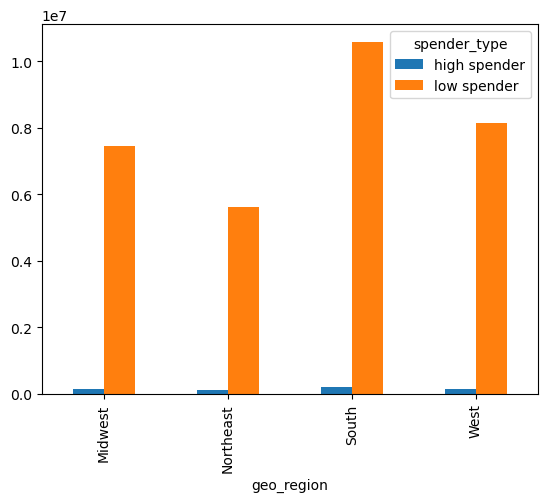

In [20]:
region_spending_counts_bar= region_spending_counts.plot.bar()

4. Low-activity customer flag

In [22]:
df['max_order'].value_counts(dropna=False)

max_order
99    1171333
8      811843
6      811396
9      810213
7      803979
       ...   
97      44949
98      44587
96      40453
2           6
1           5
Name: count, Length: 99, dtype: int64

In [23]:
#Creating activity flag
df.loc[df['max_order'] > 5, 'activity_flag'] = 'normal activity'
df.loc[df['max_order'] <= 5, 'activity_flag'] = 'low activity'

In [24]:
#Checking output 
df.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order_clean,product_id,product_name,department_id,prices,price_range,busiest_days,busiest_period_of_day,max_order,loyalty_flag,spending_avg,spender_type,user_frequency_median,user_frequency,gender,state,age,dependants,family_status,income,geo_region,activity_flag
0,2539329,1,1,2,8,0.0,196,Soda,7,9.0,Mid-range product,Regular days,Regularly busy,10,New customer,6.367797,low spender,20.5,non-frequent customer,Female,Alabama,31,3,married,40423,South,normal activity
1,2539329,1,1,2,8,0.0,14084,Organic Unsweetened Vanilla Almond Milk,16,12.5,Mid-range product,Regular days,Regularly busy,10,New customer,6.367797,low spender,20.5,non-frequent customer,Female,Alabama,31,3,married,40423,South,normal activity
2,2539329,1,1,2,8,0.0,12427,Original Beef Jerky,19,4.4,Low-range product,Regular days,Regularly busy,10,New customer,6.367797,low spender,20.5,non-frequent customer,Female,Alabama,31,3,married,40423,South,normal activity
3,2539329,1,1,2,8,0.0,26088,Aged White Cheddar Popcorn,19,4.7,Low-range product,Regular days,Regularly busy,10,New customer,6.367797,low spender,20.5,non-frequent customer,Female,Alabama,31,3,married,40423,South,normal activity
4,2539329,1,1,2,8,0.0,26405,XL Pick-A-Size Paper Towel Rolls,17,1.0,Low-range product,Regular days,Regularly busy,10,New customer,6.367797,low spender,20.5,non-frequent customer,Female,Alabama,31,3,married,40423,South,normal activity


In [25]:
#Dropping low activity customers
df_clean= df[df['activity_flag'] != 'low activity']

In [26]:
#Checking output 
df_clean['activity_flag'].value_counts(dropna=False)

activity_flag
normal activity    30171424
Name: count, dtype: int64

5. Exporting files and visualizations 

In [28]:
#Export data to pkl
df_clean.to_pickle(os.path.join(path, '02_Data','Prepared Data', 'ord_prod_cust_final4.10.pkl'))

In [29]:
region_spending_counts_bar.figure.savefig(os.path.join(path, '04_Analysis', 'Visualizations', 'spending_per_region.png'))

Profiling variable, visualizations, aggregations in notebook '10032025_CFDA Exercise 4.10 Coding Etiquette and Excel Reporting Pt 2 - Alejandra Castro'